In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sb.set_style("whitegrid")
#sb.set(rc={'figure.figsize':(8,6)})
#sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
#sb.set_style("dark")

#statistical test
from scipy.stats import f_oneway
from scipy.stats import ttest_ind 

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [4]:
hdf = pd.read_csv('hour.csv', delimiter = ',') 

In [5]:
hdf.loc[(hdf['weekday'] < 6) & ( hdf['weekday'] > 0), 'weekday_1']  = 'Weekday'########################################


In [6]:
hdf.loc[(hdf['weekday'] == 6) | ( hdf['weekday'] == 0), 'weekday_1']  = 'Weekend' ###################################

In [7]:
hdf.loc[hdf['holiday'] == 0, 'is_holiday'] = 'No'

hdf.loc[hdf['holiday'] == 1, 'is_holiday'] = 'Yes'

In [8]:

hdf.loc[hdf['season'] == 1, 'season_1'] = 'Winter'
hdf.loc[hdf['season'] == 2, 'season_1'] = 'Spring'
hdf.loc[hdf['season'] == 3, 'season_1'] = 'Summer'
hdf.loc[hdf['season'] == 4, 'season_1'] = 'Fall'

#hdf.head()

In [9]:
#holiday or not 
hdf['workingday_1'] = hdf['workingday'].apply(lambda x : "working day" if x==1 else "Not working day")   
hdf['holiday_1'] = hdf['holiday'].apply(lambda x : "Holiday" if x==1 else "Not holiday")   
hdf.head(30)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,weekday_1,is_holiday,season_1,workingday_1,holiday_1
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0000,3,13,16,Weekend,No,Winter,Not working day,Not holiday
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0000,8,32,40,Weekend,No,Winter,Not working day,Not holiday
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0000,5,27,32,Weekend,No,Winter,Not working day,Not holiday
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0000,3,10,13,Weekend,No,Winter,Not working day,Not holiday
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0000,0,1,1,Weekend,No,Winter,Not working day,Not holiday
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,0.75,0.0896,0,1,1,Weekend,No,Winter,Not working day,Not holiday
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,0.80,0.0000,2,0,2,Weekend,No,Winter,Not working day,Not holiday
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,0.86,0.0000,1,2,3,Weekend,No,Winter,Not working day,Not holiday
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,0.75,0.0000,1,7,8,Weekend,No,Winter,Not working day,Not holiday
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,0.76,0.0000,8,6,14,Weekend,No,Winter,Not working day,Not holiday


In [10]:
hdf["weekday"]

0        6
1        6
2        6
3        6
4        6
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: weekday, Length: 17379, dtype: int64

In [11]:

#timestamp
#hdf["hr"] = hdf["hr"].apply(lambda x: "{0:0>2}".format(x))
#hdf.loc[:,"timestamp"] = hdf["dteday"] + " " + hdf["hr"]

#hdf["timestamp"] = pd.to_datetime(hdf["timestamp"], format = "%Y-%m-%d %H")
#hdf["timestamp"]

In [12]:
#hdf.index = hdf.timestamp

In [13]:
hdf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'weekday_1', 'is_holiday', 'season_1',
       'workingday_1', 'holiday_1'],
      dtype='object')

In [23]:
hdf_merged = pd.melt(hdf, id_vars=['dteday', 'season', 'yr', 'mnth', "hr" ,'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_1', 'weekday_1', "workingday_1"], value_vars=["casual", "registered"]).sort_values(by = "dteday").reset_index (drop = True)

In [26]:
hdf1 = pd.melt(hdf, id_vars=['dteday', 'season', 'yr', "hr", 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'workingday_1', 'holiday_1', 'weekday_1', "season_1"], value_vars=["casual", "registered"]).sort_values(by = "dteday").reset_index (drop = True)

[Text(0.5, 1.0, 'Trips by hour of the day'), Text(0, 0.5, 'mean(cnt)')]

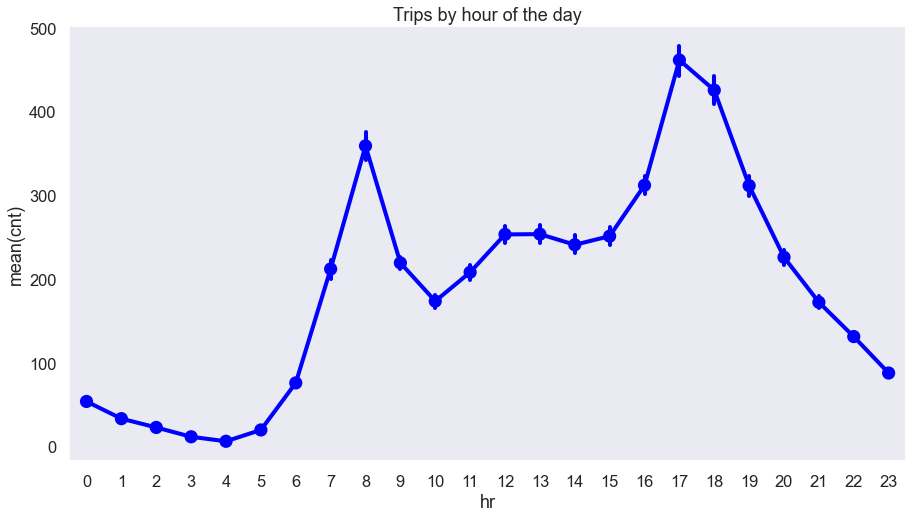

In [75]:
#style
sb.set(rc={'figure.figsize':(15,8)})
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sb.set(style="ticks", context="talk")
plt.style.use("dark_background")
sb.set_style("dark")

fig, ax = plt.subplots()
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1000.0)) 
ax = sb.pointplot(data = hdf, x = 'hr', y = 'cnt', color = "Blue");

   
#plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title;
ax.set(title = 'Trips by hour of the day',ylabel= 'mean(cnt)')

# label points on the plot


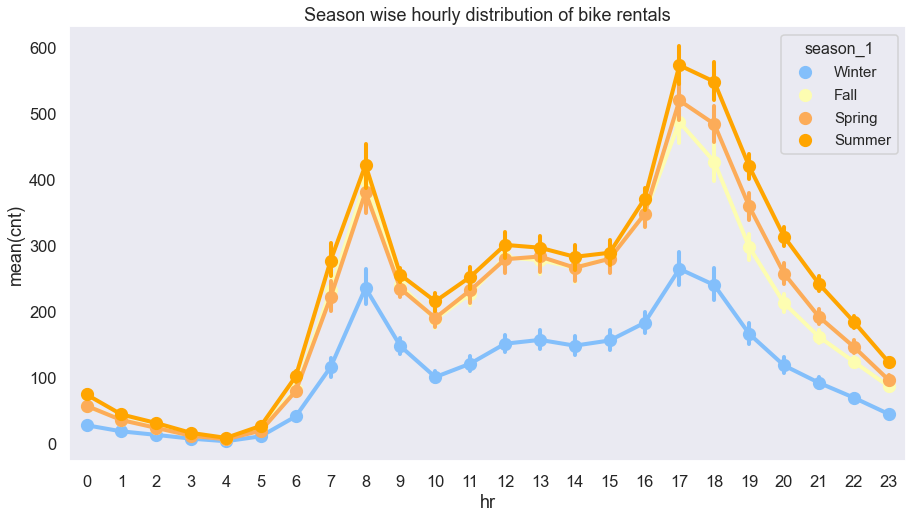

In [59]:
#style
sb.set(rc={'figure.figsize':(15,8)})
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sb.set(style="ticks", context="talk")
plt.style.use("dark_background")
sb.set_style("dark")
#from matplotlib.ticker import PercentFormatter
#import matplotlib.ticker as mtick
clrs = ['#83bffb','#fdfdb1', '#fcac59', 'orange']
fig, ax = plt.subplots()
ax = sb.pointplot(data = hdf, x = 'hr', y = 'cnt', hue = 'season_1', palette= clrs, hue_order = ["Winter", "Fall", "Spring", "Summer"])

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(cnt)');

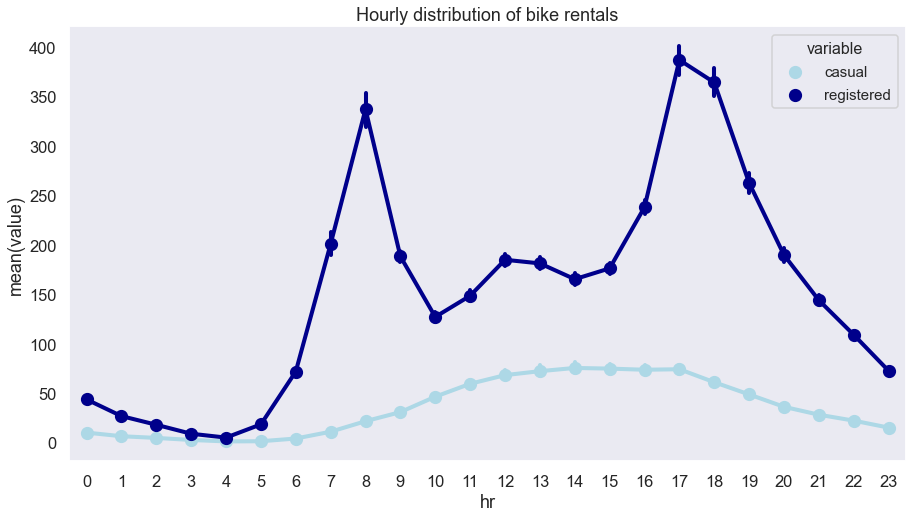

In [78]:
#style
sb.set(rc={'figure.figsize':(15,8)})
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sb.set(style="ticks", context="talk")
plt.style.use("dark_background")
sb.set_style("dark")
#from matplotlib.ticker import PercentFormatter
#import matplotlib.ticker as mtick
clrs = ['lightblue','darkblue']
fig, ax = plt.subplots()
ax = sb.pointplot(data = hdf_merged, x = 'hr', y = 'value', hue = 'variable', palette= clrs)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Hourly distribution of bike rentals',ylabel= 'mean(value)');

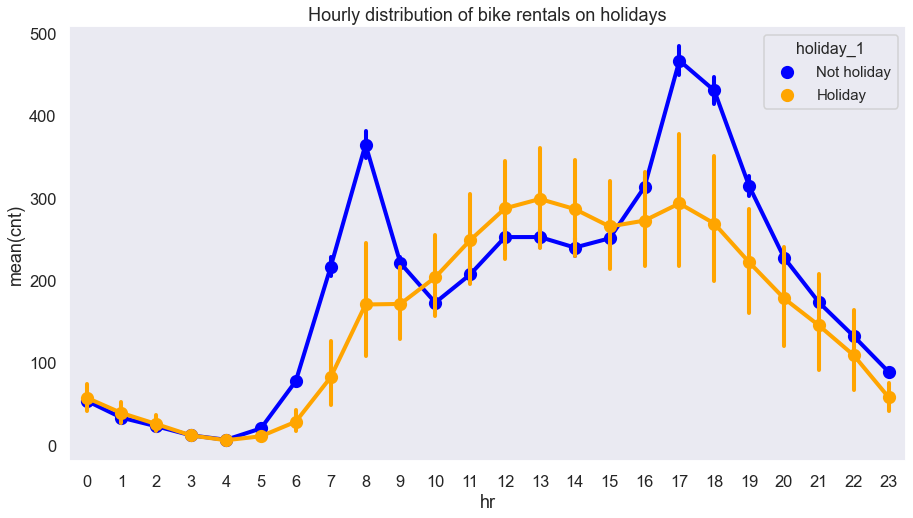

In [74]:
sb.set(rc={'figure.figsize':(15,8)})
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sb.set(style="ticks", context="talk")
plt.style.use("dark_background")
sb.set_style("dark")
clrs = ['blue', 'orange']
fig, ax = plt.subplots()
ax = sb.pointplot(data = hdf, x = 'hr', y = 'cnt', hue = 'holiday_1', palette= clrs);
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1000.0))

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Hourly distribution of bike rentals on holidays',ylabel= 'mean(cnt)');

[Text(0.5, 1.0, 'Hourly distribution of bike rentals on weekend/weekdays'),
 Text(0, 0.5, 'mean(cnt)')]

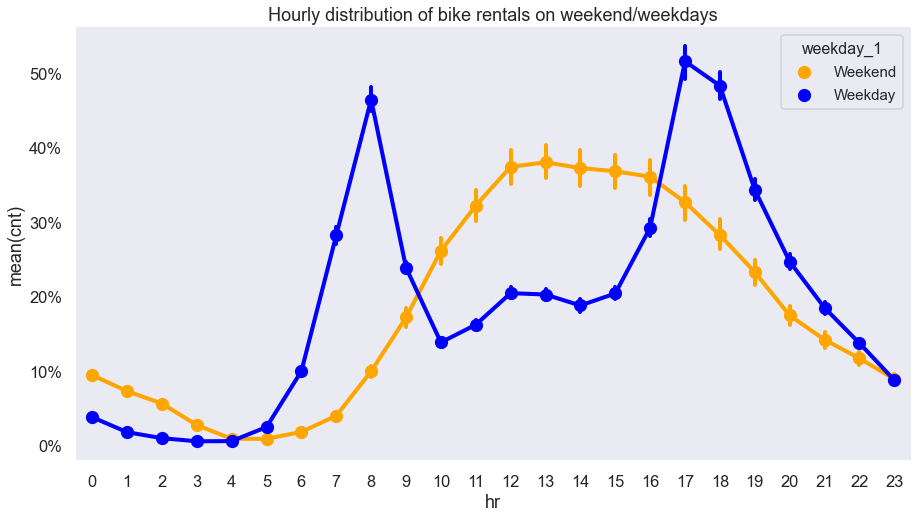

In [67]:
import matplotlib.ticker as ticker
sb.set(rc={'figure.figsize':(15,8)})
sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sb.set(style="ticks", context="talk")
plt.style.use("dark_background")
sb.set_style("dark")
clrs = ['orange', 'blue']
fig, ax = plt.subplots()
ax = sb.pointplot(data = hdf, x = 'hr', y = 'cnt', hue = 'weekday_1', palette = clrs);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1000.0))

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Hourly distribution of bike rentals on weekend/weekdays',ylabel= 'mean(cnt)')

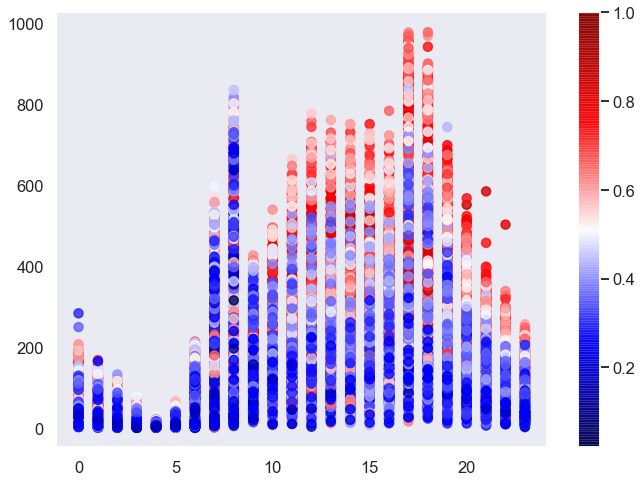

In [63]:
plt.scatter(hdf.hr, hdf.cnt, alpha = .8, c = hdf.temp, cmap = 'seismic')
cbar = plt.colorbar()